### Graduate Rotational Internship Program #GRIP21

### TASK2-Data Science and Business Analytics Intership

### Anamika Kumari Intern at The Sparks Foundation

#### From the given dataset, predict the optimum number of clusters and represent it visually. The Iris dataset consists of 4 features (sepal length and width, petal length and width) and 3 species of Iris (setosa, versicolor and virginica)

### Importing libraries

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Reading the Dataset

In [50]:
from sklearn.datasets import load_iris
dataset = load_iris()
dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [51]:
iris = pd.DataFrame(dataset.data, columns = dataset.feature_names)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [70]:
iris.shape # total number of rows and columns

(150, 5)

In [71]:
iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
clusters             0
dtype: int64

In [72]:
X = dataset.data
y = dataset.target

### Data Visualization

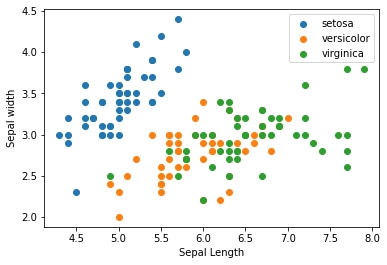

In [73]:
plt.scatter(X[y == 0,0], X[y == 0,1], label = 'setosa')
plt.scatter(X[y == 1,0], X[y == 1,1], label = 'versicolor')
plt.scatter(X[y == 2,0], X[y == 2,1], label = 'virginica')
plt.legend(loc='upper right')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal width')
plt.show()

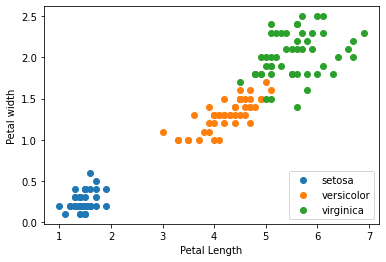

In [74]:
plt.scatter(X[y == 0,2], X[y == 0,3], label = 'setosa')
plt.scatter(X[y == 1,2], X[y == 1,3], label = 'versicolor')
plt.scatter(X[y == 2,2], X[y == 2,3], label = 'virginica')
plt.legend(loc='lower right')
plt.xlabel('Petal Length')
plt.ylabel('Petal width')
plt.show()

##### We can conclude that petal length and petal width are the better predictors since setosa is clearly separable in latter case.

### Applying the K-Means Algorithm to find the optimum number of clusters

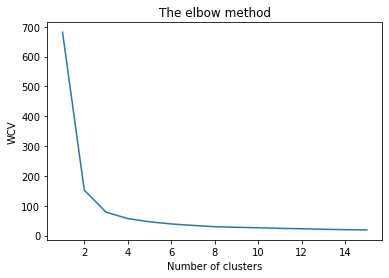

In [75]:
from sklearn.cluster import KMeans

wcv = []

for i in range(1,16):
        km = KMeans(n_clusters=i)
        km.fit(X)
        wcv.append(km.inertia_)
        
        
plt.plot(range(1,16), wcv)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCV') # within cluster variation also known as cluster sum of squares
plt.show()

#### From the above graph, we could clearly see that the elbow point is 3 which is the number of optimum clusters

In [76]:
# Creating the kmeans classifier
km = KMeans(n_clusters = 3)
y_pred = km.fit_predict(X)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [77]:
iris['clusters'] = y_pred
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clusters
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


### Visualizing the clusters of sepal length and sepal width

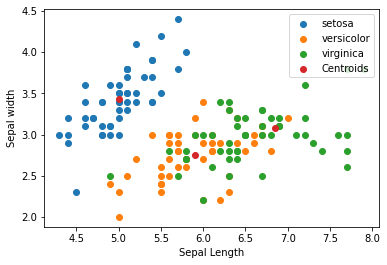

In [78]:
plt.scatter(X[y == 0,0], X[y == 0,1], label = 'setosa')
plt.scatter(X[y == 1,0], X[y == 1,1], label = 'versicolor')
plt.scatter(X[y == 2,0], X[y == 2,1], label = 'virginica')

# Plotting the centroids

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], label = 'Centroids')
plt.legend(loc='upper right')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal width')
plt.show()

### Visualizing the clusters of petal length and petal width


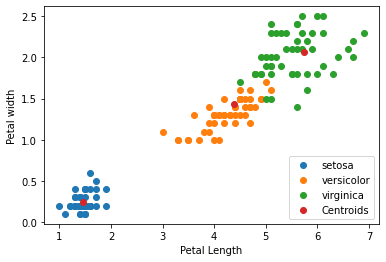

In [79]:
plt.scatter(X[y == 0,2], X[y == 0,3], label = 'setosa')
plt.scatter(X[y == 1,2], X[y == 1,3], label = 'versicolor')
plt.scatter(X[y == 2,2], X[y == 2,3], label = 'virginica')

# Plotting the centroid

plt.scatter(km.cluster_centers_[:,2], km.cluster_centers_[:,3], label = 'Centroids')
plt.legend(loc='lower right')
plt.xlabel('Petal Length')
plt.ylabel('Petal width')
plt.show()

### Conclusion: We are able to predict the optimum number of clusters is 3 and also visualize them with the help of scatter plot

### Thank you